# Julia Scratchpad for VMLS

In [1]:
# Already Installed the appropriate libraries

In [2]:
using LinearAlgebra, SparseArrays, VMLS, Plots

┌ Info: Precompiling VMLS [44dac47c-a70e-11e8-3cff-fbf5f1f7c554]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [3]:
a = [1, 2, 3]
typeof(a)

Array{Int64,1}

In [4]:
length(a)

3

In [5]:
# Mini-Python API for utility, error-correction, and poka-yoke (see https://www.google.com/search?q=Poka-yoke)
type = typeof
len = length

length (generic function with 179 methods)

## Cuidado!
- Always remember commas between elements in Julia (or we'll get something that's not a vector)
- Always remember square brackets for vectors/arrays or we'll get tuples

In [6]:
# Julia indexing is 1-index
a = [5, 6, 7, 8]
a[1]

5

In [7]:
# Assignment vs. copying
# It appears that Julia assignment works like referenes to objects...
a = [1, 2, 3]
b = a
b[2] = 5
a

3-element Array{Int64,1}:
 1
 5
 3

In [8]:
# So if we want a copy, we'll need to make a copy
a = [1, 2, 3]
b = copy(a)
b[2] = 5
a

3-element Array{Int64,1}:
 1
 2
 3

In [9]:
# Vector Equality
a == b

false

In [10]:
a == [1, 2, 3]

true

In [11]:
# Julia doesn't treat 1-vectors as scalars or scalars as 1-vectors, unfortunately.
# It would be nice to expand the functionality of the data types and operators to support this...
1 == [1]

false

In [12]:
a = [3]
3 == a[1]

true

In [13]:
# Blocked or stacked Vectors use the semicolon operator or the vcat vertical concatenation function
x = [1, 2, 3]
y = [4, 5, 6]
z = [x; y]
z

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

In [14]:
z = vcat(x, y)
z

6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6

In [15]:
# As with the mathematical notation, we can concatenate/block/stack vectors with scalars
z = [x; 3.141; y; [4, 4]]

9-element Array{Float64,1}:
 1.0
 2.0
 3.0
 3.141
 4.0
 5.0
 6.0
 4.0
 4.0

In [16]:
# Subvectors and slicing
# Slicing is inclusive of beginning and ending elements
a = [5, 6, 7, 8]
a[1:3]

3-element Array{Int64,1}:
 5
 6
 7

In [17]:
# Reassign a slice
a[1:3] = [2, 2, 2]
a

4-element Array{Int64,1}:
 2
 2
 2
 8

In [18]:
1 in [1, 2, 3]

true

In [19]:
# this would be cooler if it were vectorized...
[1, 2] in [2, 2, 3]

false

In [20]:
# The issubset function works
issubset([1, 2], [1, 2, 3])

true

In [21]:
# Holy Guacamole!
# Use the latex symbol \subseteq and it works
[1, 2] ⊆ [1, 2, 3]

true

In [22]:
π * 4

12.566370614359172

In [23]:
# The latex \leq produces the correct operator and the correct operation!
2 ≤ 3

true

In [24]:
# The latex \in symbol is fully operational (for scalar membership)
2 ∈ [1, 2, 3]

true

In [25]:
[1, 2] ∈ [[1, 2], 3]

true

In [26]:
[1] ∈ [1; 2; 3]

false

In [27]:
a = [1, 2, 3, 4, 5]

# the end argument is right on target!
a[3:end]

3-element Array{Int64,1}:
 3
 4
 5

In [28]:
# End returns the last element of the array
a[end]

5

In [29]:
x = [1, 0, 0, -2, 2]

# Build a vector of differences using "end"
# "end-1" needs the operator/operands right close together
d = x[2:end] - x[1:end-1]

4-element Array{Int64,1}:
 -1
  0
 -2
  4

In [30]:
# Making lists of vectors in Julia
a = [1, 2, 3]
b = [4, 5, 6]
c = [7, 8, 9]
list = [a, b, c]

3-element Array{Array{Int64,1},1}:
 [1, 2, 3]
 [4, 5, 6]
 [7, 8, 9]

In [31]:
# second element of the list
list[2]

3-element Array{Int64,1}:
 4
 5
 6

In [32]:
# NOTE the difference between the list [a, b, c] (which is an array of arrays) and the block vector [a; b; c]

In [33]:
# list of vectors vs. concatednated vectors
a = [1, 2]
b = [2, 3]
c = [3, 4]

# block/stack/concatenated vectors
d = [a; b; c]

e = [a, b, c]

println("d is", d)
println("e is", e)

d is[1, 2, 2, 3, 3, 4]
e is[[1, 2], [2, 3], [3, 4]]


In [34]:
# Zero vectors
zeros(2)

2-element Array{Float64,1}:
 0.0
 0.0

In [35]:
# Creates a vector of zeros the length of a
zeros(length(a))

2-element Array{Float64,1}:
 0.0
 0.0

In [36]:
# Unit vectors
i = 2; n = 4;

ei = zeros(n)

# Set the i-th element to 1
ei[i] = 1 
ei

4-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0

In [37]:
function unit_vector(i, n)
    return [zeros(i-1); i; [zeros(n-i)]]
end

unit_vector (generic function with 1 method)

In [38]:
# Another way to create ei

# This creates a funcion
unit_vector(i, n) = [zeros(i-1); 1; zeros(n-i)]

unit_vector (generic function with 1 method)

In [39]:
println("e_i for 1 is ", unit_vector(1, 3))
println("e_i for 2 is ", unit_vector(2, 3))
println("e_i for 3 is ", unit_vector(3, 3))

e_i for 1 is [1.0, 0.0, 0.0]
e_i for 2 is [0.0, 1.0, 0.0]
e_i for 3 is [0.0, 0.0, 1.0]


In [40]:
# Ones vector
ones(2)

2-element Array{Float64,1}:
 1.0
 1.0

In [41]:
# rand is a function that makes a vector of random numbers between 0 and 1
rand(3)

3-element Array{Float64,1}:
 0.0672415669696198
 0.5614848111832593
 0.5174842851751231

In [42]:
# randn generates random numbers with a Gaussian distribution
randn(3)

3-element Array{Float64,1}:
 -0.09177898494299164
 -1.2548981161454174
  1.4301516949339843

## Plotting with Plots.jl

In [43]:
# import
using Plots

In [44]:
temps = rand(20) * 80

20-element Array{Float64,1}:
 68.6904629253788
 16.6210219453054
 13.149306147089721
 48.33281902675928
 59.65436608983474
 59.65614009547109
 36.767038394119105
 66.17082794368797
 31.003782481902622
 17.87477787325031
 68.21974157732377
 25.518255482745946
 56.64585935706447
  0.40711290765949926
 29.044885353280634
 25.129100523523817
 23.021181849737538
 15.378384534461382
 77.30529915260787
 13.665436528045163

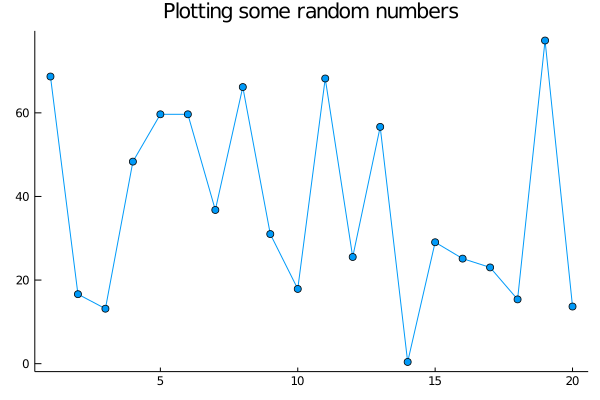

In [45]:
plot(temps, marker = :circle, legend=false, grid=false, title="Plotting some random numbers")

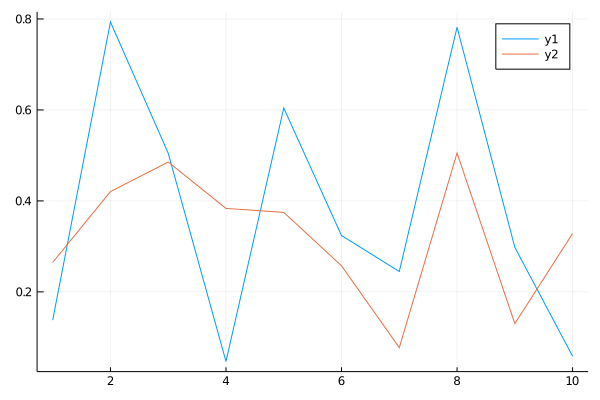

In [46]:
x = 1:10
y = rand(10, 2) # 2 columns means two lines
plot(x, y)

In [47]:
# vector addition
a = [1, 2]
b = [3, 3]
c = a + b

2-element Array{Int64,1}:
 4
 5

In [48]:
# Scalar-Vector Multiplication
a * 5

2-element Array{Int64,1}:
  5
 10

In [49]:
# scalar-vector division
a / 2

2-element Array{Float64,1}:
 0.5
 1.0

In [50]:
# add a scalar to each element in a vector
# the . dot notation vectorizes the + operator
a .+ 4

2-element Array{Int64,1}:
 5
 6

In [51]:
# Element-wise operations
# This is element-wise division

initial = [1, 2, 3, 4, 5]
final = [1, 3, 5, 6, 7]

r = (final - initial) ./ initial

5-element Array{Float64,1}:
 0.0
 0.5
 0.6666666666666666
 0.5
 0.4

In [52]:
# element-wise operations with a scalar
w = [1, 2, 2]
z = [1, 2, 3]
w == z # compares the entire vector

false

In [53]:
w .== z # bit array holding each equality at each index

3-element BitArray{1}:
 1
 1
 0

In [54]:
# we can combine element-wise operations with conditions like so:
x = randn(5)

# Obtain the boolean mask
x .> 0

5-element BitArray{1}:
 0
 0
 0
 0
 0

In [55]:
# Return only the positive values
x[x .> 0]

Float64[]

In [56]:
# dot notation works with assignment, too
x = [1, 2, 4]
x[2:3] .= 3
x

3-element Array{Int64,1}:
 1
 3
 3

## Linear Combinations
We can form linear combinations in Julia using scalar-vector multiplication and addition

In [57]:
a = [1, 2]
b = [3, 4]
alpha = -.5
beta = 1.5
c = alpha*a + beta*b

2-element Array{Float64,1}:
 4.0
 5.0

In [58]:
# Let's make a function that produces linear combinations!
function linear_combination(coeff, vectors)
    n = length(vectors[1]) # Length of vectors
    a = zeros(n)
    for i = 1:length(vectors)
        a = a + coeff[i] * vectors[i]
    end
    return a
end


linear_combination (generic function with 1 method)

In [59]:
a = [1, 2]
b = [3, 4]
alpha = -.5
beta = 1.5
linear_combination((alpha, beta), (a, b))

2-element Array{Float64,1}:
 4.0
 5.0

In [60]:
# A more concise definition
function lincomb(coeff, vectors)
    return sum(coeff[i] * vectors[i] for i = 1:length(vectors))
end

lincomb((alpha, beta), (a, b))

2-element Array{Float64,1}:
 4.0
 5.0

## Checking Properties!
- let's check the disributive property
- $\beta(a + b) = \beta a + \beta b$

In [61]:
a = rand(3); b = rand(3)
beta = rand()

0.5088129720067633

In [62]:
lhs = beta*(a + b)

3-element Array{Float64,1}:
 0.5217539581401269
 0.5521782908021339
 0.5144694476385927

In [63]:
rhs = beta*a + beta*b

3-element Array{Float64,1}:
 0.5217539581401269
 0.5521782908021339
 0.5144694476385927

In [64]:
# arrays are approximately equal
lhs ≈ rhs

true

In [65]:
# let's check element-wise approximate equality
lhs .≈ rhs

3-element BitArray{1}:
 1
 1
 1

In [66]:
# Since == is exact, we should probably use \approx to account for rounding errors and ieee754 floating point issues
lhs == rhs

true

In [67]:
lhs .== rhs

3-element BitArray{1}:
 1
 1
 1

## Inner Product

In [68]:
x = [1, 2, 3]
y = [2, 3, 4]
x'y

20

In [69]:
# Net present value (Net present value of a cashflow vector c, with per-period interest rate r)
c = [0.1, 0.1, 0.1, 1.1] # Cashflow vector
n = length(c)
r = 0.05 # 5% per period interest rate

d = (1 + r).^ -(0:n-1)

4-element Array{Float64,1}:
 1.0
 0.9523809523809523
 0.9070294784580498
 0.863837598531476

In [70]:
NPV = c'd

1.236162401468524

In [71]:
# school aged population is between 6 to 19
s = [zeros(5); ones(14); zeros(81)]

# Produce a random distribution of number of people per age
x = rand(length(s)) * 1000

# Inner product of s and x is the sum
round(s'x)

7890.0

## Complexity of Vector Computations
- Floating point operations
- Example: $(a + b)(a - b) = a^2 - b^2$

In [72]:
a = rand(); b = rand()
lhs = (a + b) * (a - b)
rhs = a^2 - b^2

-0.47822252542423804

In [73]:
lhs == rhs

true

In [74]:
lhs ≈ rhs

true

In [75]:
# Complexity of operations
# With Julia, we can add @time to time things
a = rand(10^5); b = rand(10^5)
@time a'b

  0.000161 seconds (2 allocations: 32 bytes)


25009.616360497814

In [76]:
@time a'b

  0.000094 seconds (2 allocations: 32 bytes)


25009.616360497814

In [77]:
# Working with sparse vectors
a = sparsevec([123456, 123457], [1.0, -1.0], 10^6)

1000000-element SparseVector{Float64,Int64} with 2 stored entries:
  [123456 ]  =  1.0
  [123457 ]  =  -1.0

In [78]:
# Number of nonzero entries
nnz(a)

2

In [79]:
b = randn(10^6) # an ordinary vector of the same length

1000000-element Array{Float64,1}:
 -1.8226296988868247
 -0.15519595453120108
  0.2958933749263185
  0.20137006553603676
  0.7442758428375917
 -0.4299753786242495
  0.7760039512902339
 -1.7888061139473082
  0.4555339454775161
 -0.1474177630003791
  0.4845119973649062
 -0.4938372354758468
 -0.2590967972405181
  ⋮
  0.10486499705306838
  0.6303052778542186
  0.4703312857434053
  0.6866810827183389
 -1.5724541795882399
 -0.05559455776129448
 -1.753345472184254
 -0.15169449324598913
  1.655424680277913
  0.9858432639508826
  1.3920990267499118
  0.8429821031868624

In [80]:
@time 2*a


  0.067053 seconds (148.45 k allocations: 7.600 MiB)


1000000-element SparseVector{Float64,Int64} with 2 stored entries:
  [123456 ]  =  2.0
  [123457 ]  =  -2.0

In [81]:
@time 2*b

  0.017965 seconds (5 allocations: 7.630 MiB, 73.93% gc time)


1000000-element Array{Float64,1}:
 -3.6452593977736494
 -0.31039190906240216
  0.591786749852637
  0.4027401310720735
  1.4885516856751835
 -0.859950757248499
  1.5520079025804678
 -3.5776122278946163
  0.9110678909550322
 -0.2948355260007582
  0.9690239947298124
 -0.9876744709516936
 -0.5181935944810362
  ⋮
  0.20972999410613677
  1.2606105557084373
  0.9406625714868107
  1.3733621654366779
 -3.1449083591764797
 -0.11118911552258896
 -3.506690944368508
 -0.30338898649197826
  3.310849360555826
  1.9716865279017652
  2.7841980534998236
  1.6859642063737248

In [82]:
@time b'b

  0.000883 seconds (2 allocations: 32 bytes)


999198.3835031702

In [83]:
@time a'a

  0.070080 seconds (89.46 k allocations: 4.857 MiB)


2.0

In [84]:
@time c = a + b

  0.415176 seconds (1.28 M allocations: 96.221 MiB, 5.40% gc time)


1000000-element SparseVector{Float64,Int64} with 1000000 stored entries:
  [1      ]  =  -1.82263
  [2      ]  =  -0.155196
  [3      ]  =  0.295893
  [4      ]  =  0.20137
  [5      ]  =  0.744276
  [6      ]  =  -0.429975
  [7      ]  =  0.776004
  [8      ]  =  -1.78881
  [9      ]  =  0.455534
  [10     ]  =  -0.147418
             ⋮
  [999990 ]  =  0.630305
  [999991 ]  =  0.470331
  [999992 ]  =  0.686681
  [999993 ]  =  -1.57245
  [999994 ]  =  -0.0555946
  [999995 ]  =  -1.75335
  [999996 ]  =  -0.151694
  [999997 ]  =  1.65542
  [999998 ]  =  0.985843
  [999999 ]  =  1.3921
  [1000000]  =  0.842982